In [ ]:
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import pandas as pd
import numpy as np


def auc_classification(df, df_original):
    auc_ind = []
    for i in range(df_original.shape[1]):
        auc_ind.append(roc_auc_score(df['label'], df_original[df_original.columns[i]]))

    return auc_ind


def find_max_ind(auc_ind):
    auc_ind = np.array(auc_ind)
    ind = np.argpartition(auc_ind, -3)[-3:]
    return ind, auc_ind[ind]


def auc_metrics(df_label, df_original, index):
    return r_curve




# Cancer.csv


 
AUC index for each column 
 [0.9375165160403784, 0.7758244807356903, 0.9468976269753184, 0.9383158923946937, 0.7220416468474182, 0.86378230537498, 0.9378270175994926, 0.9644376618571957, 0.6985624438454627, 0.48453437978965175, 0.8683341261032713, 0.5115942603456478, 0.8763939538079382, 0.9264111304899318, 0.4688375350140056, 0.7272805348554516, 0.7808189313461233, 0.7917921885735425, 0.4448892764653031, 0.6203028381163787, 0.9704428941387877, 0.7846308334654617, 0.9754505575815232, 0.9698284974367105, 0.7540563395169388, 0.8623024681570742, 0.921363828550288, 0.9667036625971144, 0.736939115268749, 0.6859706146609588]
 
Columns number with max AUC 
 [23 20 22]
 
AUC max indexes 
 [0.9698285  0.97044289 0.97545056]


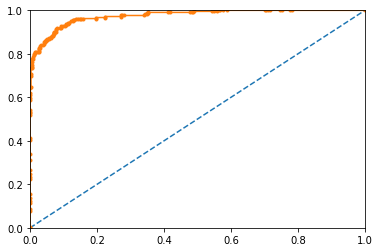

In [139]:
df = pd.read_csv('/Users/alena_paliakova/Google Drive/!Bioinf_drive/02_MachinLearn/HW3/cancer.csv')

df_original = df.drop(columns='label')

auc_ind = auc_classification(df, df_original)
print(' \nAUC index for each column \n', auc_ind)

ind_max = find_max_ind(auc_ind)[0]

print(' \nColumns number with max AUC \n', ind_max)

print(' \nAUC max indexes \n', find_max_ind(auc_ind)[1])

df_1 = df.label

df_label = df_1.values

for i in range(len(df_label)):
    if df_label[i] == 'M':
        df_label[i] = 2
    elif df_label[i] == 'B':
        df_label[i] = 0
df_label = list(df_label)

column = df.iloc[:, ind_max[0]].values.tolist()

r_curve = metrics.roc_curve(df_label, column, pos_label=2)

fpr, tpr, treshold = r_curve

pyplot.xlim(0, 1)
pyplot.ylim(0, 1)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

# Spam.csv

 
AUC index for each column 
 [0.6046323934979398, 0.6216014421589334, 0.6753142258881139, 0.5093402225755167, 0.7109324613167614, 0.6357693044257915, 0.7031303292576095, 0.6357601049648601, 0.6156987514847733, 0.6393338482393617, 0.6317478540526297, 0.5822346736980883, 0.5852025384972709, 0.5410448292698754, 0.5706599713055954, 0.7327284572365533, 0.6482528739907301, 0.6293136569064013, 0.7104681358370639, 0.5960971732133855, 0.7801659226643854, 0.5222278759888925, 0.6551896632087244, 0.6778975927879392, 0.32393527615396844, 0.36586493529514635, 0.3633321159709764, 0.43024127910887494, 0.43836776635505875, 0.42375377969249667, 0.44882329991983616, 0.4641313018285759, 0.4542554332214099, 0.46585882210497914, 0.43257675515822674, 0.44237843456433334, 0.3967978753795519, 0.49965605886388836, 0.4582851927850903, 0.5085915051584246, 0.47390004122941204, 0.44748067321852936, 0.46977937516470003, 0.4619644825629659, 0.4662309551374934, 0.43617918492380475, 0.49730455794710765, 0.470774796405

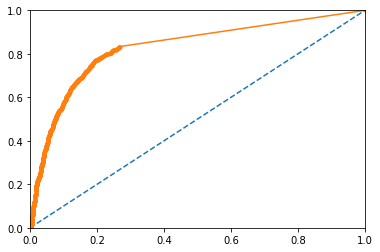

In [144]:

df = pd.read_csv('/Users/alena_paliakova/Google Drive/!Bioinf_drive/02_MachinLearn/HW3/spam.csv')

df_original = df.drop(columns='label')

auc_ind = auc_classification(df, df_original)
print(' \nAUC index for each column \n', auc_ind)

ind_max = find_max_ind(auc_ind)[0]

print(' \nColumns number with max AUC \n', ind_max)

print(' \nAUC max indexes \n', find_max_ind(auc_ind)[1])

df_1 = df.label

df_label = df_1.values

for i in range(len(df_label)):
    if df_label[i] == 1:
        df_label[i] = 2
    elif df_label[i] == 0:
        df_label[i] = 0
df_label = list(df_label)

column = df.iloc[:, ind_max[2]].values.tolist()

r_curve = metrics.roc_curve(df_label, column, pos_label=2)

fpr, tpr, treshold = r_curve

pyplot.xlim(0, 1)
pyplot.ylim(0, 1)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()